# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the northern hemisphere tends to be colder this time of year than the southern hemisphere. This may be due to the tilt of the earth, thus the northern hemisphere is in winter (rather than summer).
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at -20, 20 with 0% cloudiness. Only a few cities in the southern hemisphere are experiencing 100% cloudiness.
* There is no strong relationship between latitude and humidity. However there is an interesting cluster in between latitude 60 - 80 with no humidity.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a group of cities with over 20 mph of wind.

---

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [236]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [237]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/find?"

# Create settings dictionary with information we're interested in
units = "imperial"

settings = {"appid" : api_key,
            "units" : units
           }

# set up lists to hold reponse info
name = []
lat = []
lon = []
temp = []
humid = []
wind = []
clouds = []
country = []
date = []

# print Report header
print(f"Beginning Data Retrieval")
print("-----------------------------")  

# Loop through the list of cities and perform a request for data on each
for x, city in enumerate(cities):
    
    # subset data
    if x==0:
        set=1
        
    # Build query URL and request your results in Celsius
    query_url = f"{url}appid={api_key}&units={units}&q="


    # assemble url and make API request  
    response = requests.get(query_url + city).json()


    # extract results
    try:
        print(f"Processing Record {x} of Set {set} | {city}") 

        name.append(response['list'][0]['name'])
        lat.append(response['list'][0]['coord']['lat'])
        lon.append(response['list'][0]['coord']['lon'])
        temp.append(response['list'][0]['main']['temp_max'])
        humid.append(response['list'][0]['main']['humidity'])
        wind.append(response['list'][0]['wind']['speed'])
        clouds.append(response['list'][0]['clouds']['all'])
        country.append(response['list'][0]['sys']['country'])
        date.append(response['list'][0]['dt'])
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
    if x%49==0 and x!=0: 
        # Add a 61 second interval between sets to stay within API query limits
        # Note: limit 60 calls per min.
        time.sleep(61)
        set=set+1
        
# print out at conclusion
print("-----------------------------")
print("Data Retrieval Complete")    
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | rio gallegos
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | luwuk
Processing Record 4 of Set 1 | souillac
Processing Record 5 of Set 1 | alvarado
Processing Record 6 of Set 1 | abu dhabi
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | buariki
City not found. Skipping...
Processing Record 9 of Set 1 | yulara
Processing Record 10 of Set 1 | constitucion
Processing Record 11 of Set 1 | gusau
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | dire dawa
Processing Record 14 of Set 1 | saint-augustin
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | luangwa
Processing Record 18 of Set 1 | igarka
Processing Record 19 of Set 1 | oum hadjer
Processing Record 20 of Set 1 | buloh kasap
Processing Recor

Processing Record 186 of Set 4 | bargal
City not found. Skipping...
Processing Record 187 of Set 4 | portales
Processing Record 188 of Set 4 | lavrentiya
Processing Record 189 of Set 4 | hailar
Processing Record 190 of Set 4 | anadyr
Processing Record 191 of Set 4 | robertsport
Processing Record 192 of Set 4 | upernavik
Processing Record 193 of Set 4 | port hedland
Processing Record 194 of Set 4 | college
Processing Record 195 of Set 4 | carnarvon
Processing Record 196 of Set 4 | pacific grove
Processing Record 197 of Set 5 | bosaso
Processing Record 198 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 199 of Set 5 | shahreza
Processing Record 200 of Set 5 | ribeira grande
Processing Record 201 of Set 5 | port-cartier
Processing Record 202 of Set 5 | darnetal
Processing Record 203 of Set 5 | skelleftea
Processing Record 204 of Set 5 | necochea
Processing Record 205 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 206 of Set 5 | angoche
Proce

Processing Record 365 of Set 8 | mercedes
Processing Record 366 of Set 8 | chara
Processing Record 367 of Set 8 | port moresby
Processing Record 368 of Set 8 | tsienyane
City not found. Skipping...
Processing Record 369 of Set 8 | gat
Processing Record 370 of Set 8 | jaggayyapeta
Processing Record 371 of Set 8 | moelv
Processing Record 372 of Set 8 | mana
Processing Record 373 of Set 8 | divnomorskoye
Processing Record 374 of Set 8 | amapa
Processing Record 375 of Set 8 | gizo
Processing Record 376 of Set 8 | jiehu
Processing Record 377 of Set 8 | jacqueville
Processing Record 378 of Set 8 | kavaratti
Processing Record 379 of Set 8 | olot
Processing Record 380 of Set 8 | black river
Processing Record 381 of Set 8 | bubaque
Processing Record 382 of Set 8 | kwinana
Processing Record 383 of Set 8 | mount gambier
Processing Record 384 of Set 8 | maningrida
Processing Record 385 of Set 8 | bozova
Processing Record 386 of Set 8 | colombo
Processing Record 387 of Set 8 | udachnyy
Processing R

Processing Record 548 of Set 12 | toma
Processing Record 549 of Set 12 | shawnee
Processing Record 550 of Set 12 | ugoofaaru
Processing Record 551 of Set 12 | termoli
Processing Record 552 of Set 12 | maceio
Processing Record 553 of Set 12 | guasdualito
Processing Record 554 of Set 12 | mandal
Processing Record 555 of Set 12 | kungurtug
Processing Record 556 of Set 12 | san juan
Processing Record 557 of Set 12 | saint-pierre
Processing Record 558 of Set 12 | kaeo
Processing Record 559 of Set 12 | grand gaube
Processing Record 560 of Set 12 | acarau
City not found. Skipping...
Processing Record 561 of Set 12 | xichang
Processing Record 562 of Set 12 | marcona
City not found. Skipping...
Processing Record 563 of Set 12 | tomatlan
Processing Record 564 of Set 12 | bikaner
Processing Record 565 of Set 12 | lianran
Processing Record 566 of Set 12 | ucluelet
Processing Record 567 of Set 12 | rocha
Processing Record 568 of Set 12 | bornem
Processing Record 569 of Set 12 | nguiu
City not found

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [238]:
# Convert to DataFrame
weather_dict = {
    "City": name,
    "Cloudiness": clouds, 
    "Country": country,
    "Date": date,
    "Humidity": humid,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp,
    "Wind Speed": wind    
}

weather_data = pd.DataFrame(weather_dict)

# Export to csv
weather_data.to_csv("output_data/cities.csv", encoding="utf-8", index=False)

weather_data.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [239]:
weather_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rio Gallegos,0,AR,1547434800,52,-51.6227,-69.2182,46.40,17.22
1,Busselton,0,AU,1547435788,92,-33.6445,115.3489,70.03,12.62
2,Rikitea,88,PF,1547435789,97,-23.1203,-134.9692,80.20,12.46
3,Luwuk,56,ID,1547435789,90,-0.9504,122.7886,83.17,1.88
4,Souillac,90,FR,1547433000,87,45.6006,-0.6000,50.00,11.41
5,Alvarado,90,US,1547434500,79,32.4065,-97.2117,37.22,6.93
6,Abu Dhabi,12,AE,1547434800,87,24.4748,54.3706,60.80,5.82
7,Mar del Plata,0,AR,1547435666,65,-46.4276,-67.5191,59.41,5.57
8,Yulara,0,AU,1547431200,9,-25.2411,130.9869,107.60,12.75
9,Constitucion,5,MX,1547433960,32,23.9912,-104.6750,53.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [240]:
# weather_data.dtypes
from datetime import date
today = date.today().strftime('%m/%d/%y')

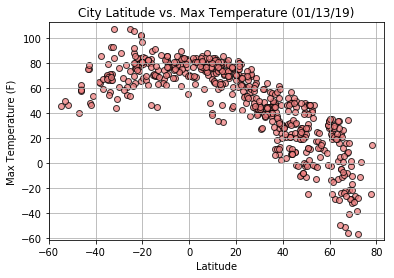

In [266]:
# Obtain the x and y coordinates
x_axis = weather_data['Lat']
y_axis = weather_data['Max Temp']

# Build the scatter plots
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightcoral", 
            edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid()
plt.xlim(weather_data['Lat'].min()-5, weather_data['Lat'].max()+5)
plt.ylim(weather_data['Max Temp'].min()-5, weather_data['Max Temp'].max()+5)

# Incorporate a text label
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save Figure
plt.savefig("LatMaxTemp.png")

#### Latitude vs. Humidity Plot

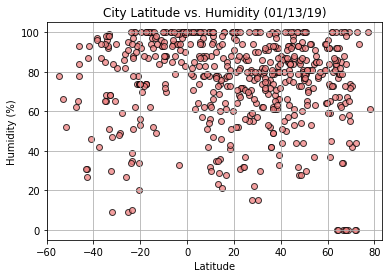

In [265]:
# Obtain the x and y coordinates
x_axis = weather_data['Lat']
y_axis = weather_data['Humidity']

# Build the scatter plots
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightcoral", 
            edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid()
plt.xlim(weather_data['Lat'].min()-5, weather_data['Lat'].max()+5)
plt.ylim(weather_data['Humidity'].min()-5, 105)

# Incorporate a text label
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save Figure
plt.savefig("LatHumid.png")

#### Latitude vs. Cloudiness Plot

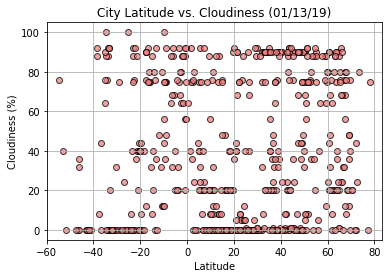

In [264]:
# Obtain the x and y coordinates
x_axis = weather_data['Lat']
y_axis = weather_data['Cloudiness']

# Build the scatter plots
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightcoral", 
            edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid()
plt.xlim(weather_data['Lat'].min()-5, weather_data['Lat'].max()+5)
plt.ylim(-5, 105)

# Incorporate a text label
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save Figure
plt.savefig("LatCloud.png")

#### Latitude vs. Wind Speed Plot

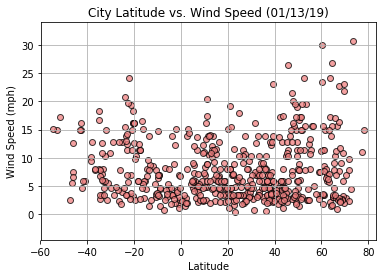

In [263]:
# Obtain the x and y coordinates
x_axis = weather_data['Lat']
y_axis = weather_data['Wind Speed']

# Build the scatter plots
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightcoral", 
            edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid()
plt.xlim(weather_data['Lat'].min()-5, weather_data['Lat'].max()+5)
plt.ylim(weather_data['Wind Speed'].min()-5, 34)

# Incorporate a text label
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save Figure
plt.savefig("LatWindSpeed.png")